<a href="https://colab.research.google.com/github/Mansouraran/AI-projects/blob/main/MansourSalari_CIFAR_10_ActivityClass_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mansour Salari (CIFAR-10 Model)

# Model_1 : CNN

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train_subset, _, y_train_subset, _ = train_test_split(x_train, y_train, train_size=0.2, random_state=42)


In [ ]:
x_train_subset = x_train_subset.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
num_classes = 10
y_train_subset = to_categorical(y_train_subset, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
print(f"x_train shape: {x_train_subset.shape}")
print(f"y_train shape: {y_train_subset.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (10000, 32, 32, 3)
y_train shape: (10000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


### The above code verifies the number of the classes and the pixel size of each image as it is 32 x 32

### To improve model generalization , I will do the data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [ ]:
datagen.fit(x_train_subset)

# CNN Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
cnn_model = Sequential([ # Sequential creates an empy neural net
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # The first convolution layer producing a stack of 32 layers
    MaxPooling2D((2, 2)), # This picks the maximum pixel intensity from the square of 2x2
    Conv2D(64, (3, 3), activation='relu'), # This is the second convolution layer which produces a stack of 64 layers
    MaxPooling2D((2, 2)), # As before this will pick the maximum intensity of the square of 2x2 matrix on each stack of the previous layer
    Flatten(), # This flattens the layers in order to be suitably feed into the neural network
    Dense(64, activation='relu'), # This connects each layer of the network
    Dropout(0.3), # this is a regulizers to avoid over fitting
    Dense(num_classes, activation='softmax') # This define the output layer with 10 classes
])

In [ ]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
batch_size = 32
epochs = 20

cnn_history = cnn_model.fit(
    datagen.flow(x_train_subset, y_train_subset, batch_size=batch_size),
    steps_per_epoch=len(x_train_subset) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/20
312/312 [==============================] - 20s 60ms/step - loss: 2.0547 - accuracy: 0.2327 - val_loss: 1.6912 - val_accuracy: 0.3808
Epoch 2/20
312/312 [==============================] - 21s 67ms/step - loss: 1.7776 - accuracy: 0.3354 - val_loss: 1.5968 - val_accuracy: 0.4133
Epoch 3/20
312/312 [==============================] - 22s 70ms/step - loss: 1.7156 - accuracy: 0.3625 - val_loss: 1.5207 - val_accuracy: 0.4546
Epoch 4/20
312/312 [==============================] - 21s 68ms/step - loss: 1.6422 - accuracy: 0.3913 - val_loss: 1.4374 - val_accuracy: 0.4848
Epoch 5/20
312/312 [==============================] - 21s 67ms/step - loss: 1.6125 - accuracy: 0.4100 - val_loss: 1.4608 - val_accuracy: 0.4627
Epoch 6/20
312/312 [==============================] - 19s 60ms/step - loss: 1.5825 - accuracy: 0.4173 - val_loss: 1.3991 - val_accuracy: 0.4970
Epoch 7/20
312/312 [==============================] - 20s 64ms/step - loss: 1.5478 - accuracy: 0.4359 - val_loss: 1.3089 - val_accuracy:

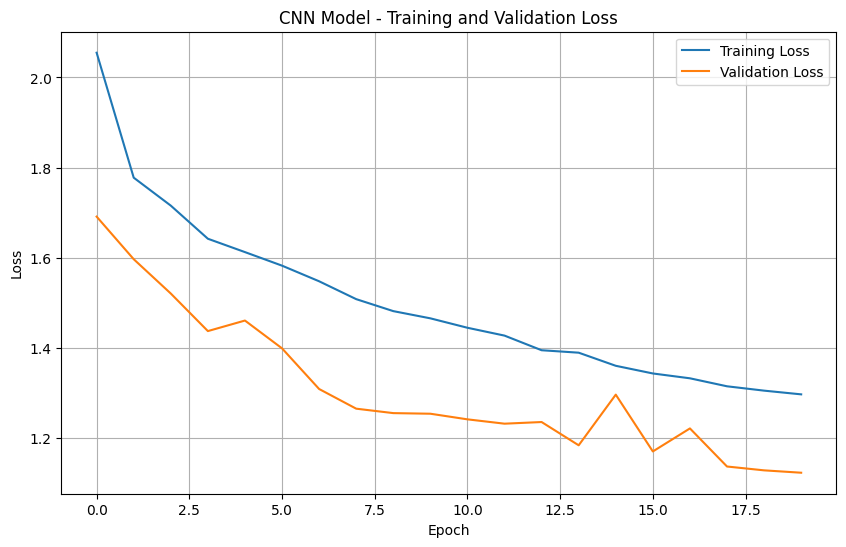

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"CNN Model - Test Accuracy: {cnn_accuracy:.4f}")

CNN Model - Test Accuracy: 0.5994


# Dense Model Architecture

### Reshape the datasets already normalised

In [ ]:
x_train_flatten = x_train_subset.reshape(-1, 32 * 32 * 3)
x_test_flatten = x_test.reshape(-1, 32 * 32 * 3)

### Model Architecture

In [ ]:
dense_model = Sequential([   # This creates an empty sequential NN that will gets filled
    Dense(128, activation='relu', input_shape=(32 * 32 * 3,)), # The first layer is with 128 neurons
    Dropout(0.3), # Regulizer to avoid overfitting
    Dense(64, activation='relu'), # This is fukky connected second layer with 64 neurons
    Dropout(0.3), # This is a regulizer to avoid overfitting
    Dense(num_classes, activation='softmax') # This defines last layer with 10 classes
])


In [ ]:
dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
dense_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               393344    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
batch_size = 32
epochs = 10

dense_history = dense_model.fit(
    x_train_flatten, y_train_subset,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test_flatten, y_test))

Epoch 1/10
313/313 [==============================] - 4s 10ms/step - loss: 2.2903 - accuracy: 0.1297 - val_loss: 2.2272 - val_accuracy: 0.1628
Epoch 2/10
313/313 [==============================] - 3s 8ms/step - loss: 2.2342 - accuracy: 0.1403 - val_loss: 2.1627 - val_accuracy: 0.1823
Epoch 3/10
313/313 [==============================] - 3s 11ms/step - loss: 2.2083 - accuracy: 0.1546 - val_loss: 2.1455 - val_accuracy: 0.1690
Epoch 4/10
313/313 [==============================] - 4s 13ms/step - loss: 2.1948 - accuracy: 0.1609 - val_loss: 2.1053 - val_accuracy: 0.1967
Epoch 5/10
313/313 [==============================] - 3s 9ms/step - loss: 2.1811 - accuracy: 0.1672 - val_loss: 2.1364 - val_accuracy: 0.1897
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 2.1605 - accuracy: 0.1757 - val_loss: 2.0794 - val_accuracy: 0.2065
Epoch 7/10
313/313 [==============================] - 3s 9ms/step - loss: 2.1456 - accuracy: 0.1836 - val_loss: 2.0815 - val_accuracy: 0.2087
Epo

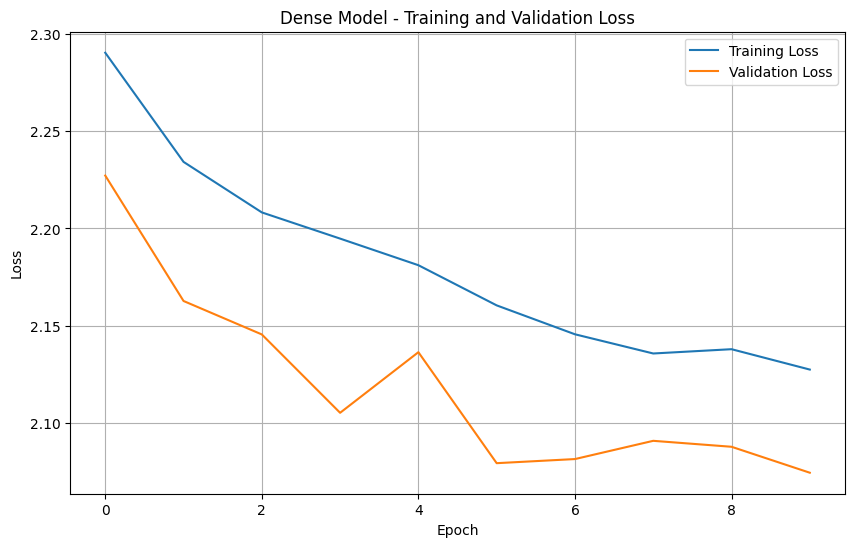

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dense_history.history['loss'], label='Training Loss')
plt.plot(dense_history.history['val_loss'], label='Validation Loss')
plt.title('Dense Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### To evaluate the Dense Model

In [ ]:
dense_loss, dense_accuracy = dense_model.evaluate(x_test_flatten, y_test, verbose=0)
print(f"Dense Model - Test Accuracy: {dense_accuracy:.4f}")

Dense Model - Test Accuracy: 0.2145


# FINAL COMPARISON

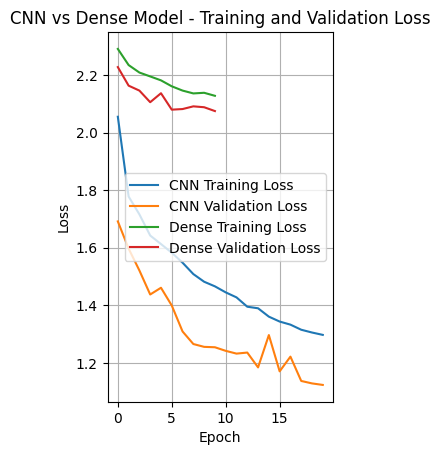

In [ ]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.plot(dense_history.history['loss'], label='Dense Training Loss')
plt.plot(dense_history.history['val_loss'], label='Dense Validation Loss')
plt.title('CNN vs Dense Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [ ]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)
dense_loss, dense_accuracy = dense_model.evaluate(x_test_flatten, y_test, verbose=0)

print(f"CNN Model - Test Accuracy: {cnn_accuracy:.4f}")
print(f"Dense Model - Test Accuracy: {dense_accuracy:.4f}")

CNN Model - Test Accuracy: 0.5994
Dense Model - Test Accuracy: 0.2145
